In [1]:
from collections import defaultdict
import itertools
import numpy as np

from benchmark import benchmark_chains
import blackjax
from blackjax.util import run_inference_algorithm
from sampling_algorithms import samplers
from inference_models import models



In [26]:


import math


def sampler_mclmc(step_size, L, noise):

    def s(logdensity_fn, num_steps, initial_position, key):

        num_steps_per_traj = L/step_size
        alg = blackjax.mclmc(
        logdensity_fn=logdensity_fn,
        step_size=step_size,
        L=L,
        noise=noise
        )
        
        _, out, info = run_inference_algorithm(
        rng_key=key,
        initial_state_or_position=initial_position,
        inference_algorithm=alg,
        num_steps=num_steps, 
        transform=lambda x: x.position, 
        progress_bar=True)

        # print(out.mean(axis=0))

        # print(info.acceptance_rate.mean(), "acceptance probability")
        # print(out.var(axis=0), "acceptance probability")

        return out, 1

    return s

results = defaultdict(float)
# MCLMCAdaptationState(L=Array(3.1222076, dtype=float32), step_size=Array(0.9004941, dtype=float32))
for model in ["Banana"]:
    # for sampler in ["mclmc"]:
    # for step_size, L, noise in itertools.product([1.005], [16.765137], np.linspace(0, 10, 10)):
    for step_size, L, noise in itertools.product(np.linspace(0.1,2, 10), [16.765137], [0.0]):
    # for step_size, L in itertools.product([0.9004941, 2.], [3.1222076]):
    # for step_size, L, noise in itertools.product([0.90049], [3.1222076], np.linspace(0, 1e2, 20)):
    # for sampler in itertools.product(np.linspace(1e-3, 1e0, 10), np.linspace(5,50, 10)):
        # result = benchmark(models[model], samplers[sampler])
        # result = benchmark_chains(models[model], samplers[sampler])
        num_steps = n=math.ceil(100000./(step_size))
        print(num_steps, "num steps"   )
        result, bias = benchmark_chains(models[model], sampler_mclmc(step_size, L, noise), batch=50, n=num_steps)
        # print(result, result2, "results")
        results[(model, step_size, L, noise)] = bias

results

1000000 num steps



crossing 36338
True mean [0. 0.]
True std [10.          4.35889894]
Empirical mean [ 0.00465225 -0.01843662]
Empirical std [9.969981 4.331024]
321429 num steps



crossing 10760
True mean [0. 0.]
True std [10.          4.35889894]
Empirical mean [ 0.02350745 -0.00479493]
Empirical std [9.991353  4.3407574]
191490 num steps



crossing 7203
True mean [0. 0.]
True std [10.          4.35889894]
Empirical mean [0.00754535 0.00712867]
Empirical std [10.010448   4.3666415]
136364 num steps



crossing 4169
True mean [0. 0.]
True std [10.          4.35889894]
Empirical mean [ 0.00056815 -0.0261774 ]
Empirical std [9.9560995 4.311671 ]
105883 num steps



crossing 3912
True mean [0. 0.]
True std [10.          4.35889894]
Empirical mean [-0.02996373 -0.04309034]
Empirical std [9.926795 4.271321]
86539 num steps



crossing 2460
True mean [0. 0.]
True std [10.          4.35889894]
Empirical mean [ 0.02865562 -0.0529291 ]
Empirical std [9.9111  4.26046]
73171 num steps



crossing 2628
True mean [0. 0.]
True std [10.          4.35889894]
Empirical mean [ 0.02320021 -0.08391798]
Empirical std [9.858228 4.202736]
63381 num steps



crossing 2004
True mean [0. 0.]
True std [10.          4.35889894]
Empirical mean [ 0.02368275 -0.16893217]
Empirical std [9.714158  4.0426064]
55901 num steps



crossing 2968
True mean [0. 0.]
True std [10.          4.35889894]
Empirical mean [-0.0038301  -0.27708766]
Empirical std [9.528275  3.8412962]
50000 num steps



crossing 3030
True mean [0. 0.]
True std [10.          4.35889894]
Empirical mean [ 0.02703223 -0.39371407]
Empirical std [9.322968  3.6544065]


defaultdict(float,
            {('Banana', 0.1, 16.765137, 0.0): Array(0.00025234, dtype=float32),
             ('Banana',
              0.3111111111111111,
              16.765137,
              0.0): Array(0.00030255, dtype=float32),
             ('Banana',
              0.5222222222222223,
              16.765137,
              0.0): Array(0.00041153, dtype=float32),
             ('Banana',
              0.7333333333333333,
              16.765137,
              0.0): Array(0.00035002, dtype=float32),
             ('Banana',
              0.9444444444444444,
              16.765137,
              0.0): Array(0.00036606, dtype=float32),
             ('Banana',
              1.1555555555555557,
              16.765137,
              0.0): Array(0.00042539, dtype=float32),
             ('Banana',
              1.3666666666666667,
              16.765137,
              0.0): Array(0.00052169, dtype=float32),
             ('Banana',
              1.577777777777778,
              16.76513

In [2]:
results = defaultdict(float)

for model in ["Banana"]:
    for sampler in ["mclmc"]:
    # for step_size in []:
    # for sampler in itertools.product(np.linspace(1e-3, 1e0, 10), np.linspace(5,50, 10)):
        # result = benchmark(models[model], samplers[sampler])
        # result = benchmark_chains(models[model], samplers[sampler])
        result = benchmark_chains(models[model], samplers[sampler], batch=20, n = 100000)
        # print(result, result2, "results")
        results[(model, sampler)] = result

results

params MCLMCAdaptationState(L=Array(21.177597, dtype=float32), step_size=Array(1.1376954, dtype=float32))
params MCLMCAdaptationState(L=Array(14.84041, dtype=float32), step_size=Array(0.7551983, dtype=float32))
params MCLMCAdaptationState(L=Array(16.06433, dtype=float32), step_size=Array(0.9211877, dtype=float32))
params MCLMCAdaptationState(L=Array(16.411818, dtype=float32), step_size=Array(1.1511111, dtype=float32))
params MCLMCAdaptationState(L=Array(17.342123, dtype=float32), step_size=Array(0.8043373, dtype=float32))
params MCLMCAdaptationState(L=Array(17.853758, dtype=float32), step_size=Array(1.0787181, dtype=float32))
params MCLMCAdaptationState(L=Array(15.327367, dtype=float32), step_size=Array(1.1615496, dtype=float32))
params MCLMCAdaptationState(L=Array(15.266425, dtype=float32), step_size=Array(1.278069, dtype=float32))
params MCLMCAdaptationState(L=Array(16.765137, dtype=float32), step_size=Array(1.0512121, dtype=float32))
params MCLMCAdaptationState(L=Array(16.871208, dt

defaultdict(float,
            {('Banana', 'mclmc'): (Array(0.01374004, dtype=float32),
              Array(0.0003792, dtype=float32))})

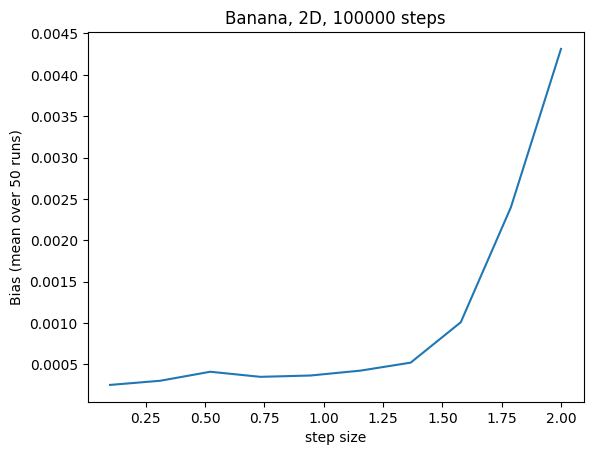

In [27]:
import matplotlib.pyplot as plt

# Extract noise values from the keys of the results dictionary
step_size_values = [key[1] for key in results.keys()]

# Extract result values from the dictionary
result_values = list(results.values())


# Plot the results against noise
plt.plot(step_size_values, result_values)
# plt.plot(noise_values, np.exp(np.array(noise_values)/10) )
plt.xlabel('step size')
plt.ylabel('Bias (mean over 50 runs)')
plt.title('Banana, 2D, 100000 steps')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Extract noise values from the keys of the results dictionary
noise_values = [key[3] for key in results.keys()]

# Extract result values from the dictionary
result_values = list(results.values())


# Plot the results against noise
plt.plot(noise_values, result_values)
# plt.plot(noise_values, np.exp(np.array(noise_values)/10) )
plt.xlabel('Noise=n*normal(0,1)')
plt.ylabel('Bias (mean over 50 runs)')
plt.title('Banana, 2D, 100000 steps')
plt.show()


params MCLMCAdaptationState(L=Array(12.025895, dtype=float32), step_size=Array(0.37484604, dtype=float32))
crossing 2532
True mean [0. 0.]
True std [10.          4.35889894]
Empirical mean [-1.0076498 -0.2394684]
Empirical std [9.526986  3.3369374]


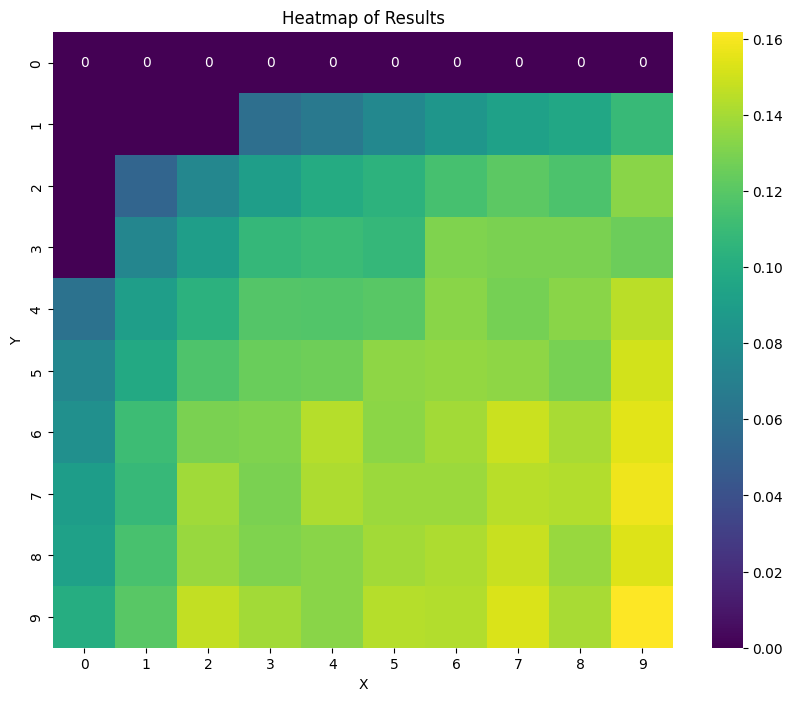

In [11]:
import seaborn as sns

import matplotlib.pyplot as plt

# Extract x and y values from the keys of the results dictionary
x_values = [key[0] for key in results.keys()]
y_values = [key[1] for key in results.keys()]

# Extract heat values from the dictionary
heat_values = list(results.values())


# Reshape the heat values into a 2D array
# heat_array = np.array(heat_values).reshape(len(x_values), len(y_values))
heat_array = np.array(heat_values).reshape((10,10))

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heat_array, annot=True, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Heatmap of Results')
plt.show()


In [12]:
results

defaultdict(float,
            {('simple', (0.001, 5.0)): Array(0., dtype=float32),
             ('simple', (0.001, 10.0)): Array(0., dtype=float32),
             ('simple', (0.001, 15.0)): Array(0., dtype=float32),
             ('simple', (0.001, 20.0)): Array(0., dtype=float32),
             ('simple', (0.001, 25.0)): Array(0., dtype=float32),
             ('simple', (0.001, 30.0)): Array(0., dtype=float32),
             ('simple', (0.001, 35.0)): Array(0., dtype=float32),
             ('simple', (0.001, 40.0)): Array(0., dtype=float32),
             ('simple', (0.001, 45.0)): Array(0., dtype=float32),
             ('simple', (0.001, 50.0)): Array(0., dtype=float32),
             ('simple', (0.112, 5.0)): Array(0., dtype=float32),
             ('simple', (0.112, 10.0)): Array(0., dtype=float32),
             ('simple', (0.112, 15.0)): Array(0., dtype=float32),
             ('simple', (0.112, 20.0)): Array(0.05875441, dtype=float32),
             ('simple', (0.112, 25.0)): Array(0.065